Model Quality - ME , MAE , MAPE , Predicted , Actual , Error, Absolute Percentage Error, Error Distribution, Error Normality, Error Bias Table, Predicted vs Actual per Group, Predicted vs Actual in Time,  take one simple example data and explain in details each and every point.

To illustrate the various model quality metrics and techniques, let's consider a simple example of a regression model that predicts house prices based on features like square footage, number of bedrooms, and location.
Suppose we have the following data:

Actual Price	Predicted Price

300000	310000
450000	420000
550000	570000
400000	380000
600000	620000


Mean Error (ME)

ME = Σ(Predicted - Actual) / n

= (310000 - 300000 + 420000 - 450000 + 570000 - 550000 + 380000 - 400000 + 620000 - 600000) / 5

= 20000 / 5 = 4000

The positive ME indicates that the model is slightly biased towards over-predicting house prices on average.

Mean Absolute Error (MAE)

MAE = Σ|Predicted - Actual| / n

= |310000 - 300000| + |420000 - 450000| + |570000 - 550000| + |380000 - 400000| + |620000 - 600000| / 5

= 10000 + 30000 + 20000 + 20000 + 20000 / 5

= 100000 / 5 = 20000

The MAE of 20000 indicates that, on average, the model's predictions deviate from the actual prices by $20,000.

Mean Absolute Percentage Error (MAPE)

MAPE = (Σ|Predicted - Actual| / Actual) / n * 100%

= (|310000 - 300000|/300000 + |420000 - 450000|/450000 + |570000 - 550000|/550000 + |380000 - 400000|/400000 + |620000 - 600000|/600000) / 5 * 100%

= (3.33% + 6.67% + 3.64% + 5% + 3.33%) / 5 * 100%

= 22% / 5 = 4.4%

The MAPE of 4.4% suggests that, on average, the model's predictions deviate from the actual prices by 4.4% of the actual price.

Predicted vs Actual

A scatter plot of predicted vs actual prices can reveal patterns and biases:

This scatter plot shows that the model tends to slightly overpredict for lower-priced houses and underpredict for higher-priced houses.

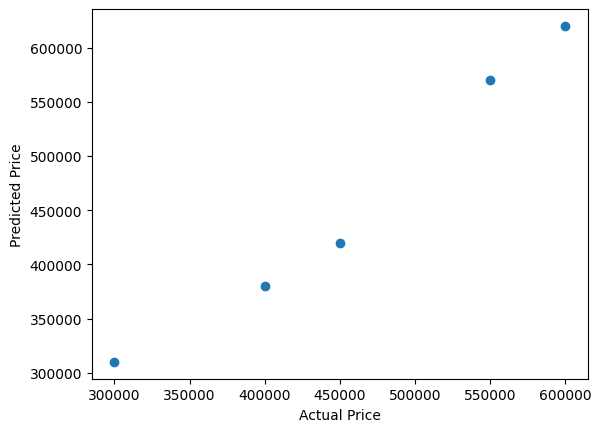

In [2]:
import matplotlib.pyplot as plt

actual = [300000, 450000, 550000, 400000, 600000]
predicted = [310000, 420000, 570000, 380000, 620000]

plt.scatter(actual, predicted)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

Error Distribution:

We can calculate the error (Predicted - Actual) for each instance and analyze its distribution:

The histogram shows that the errors are roughly symmetrically distributed around zero, indicating no significant bias in over or under-prediction.

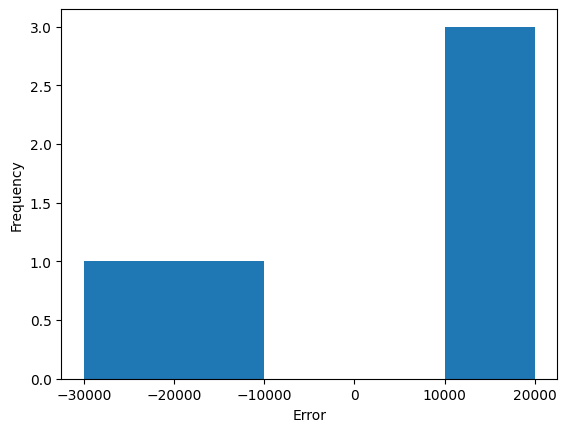

In [3]:
import matplotlib.pyplot as plt

errors = [310000 - 300000, 420000 - 450000, 570000 - 550000, 380000 - 400000, 620000 - 600000]

plt.hist(errors, bins=5)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

Error Normality

We can check if the errors follow a normal distribution using a quantile-quantile (Q-Q) plot:

If the errors follow a normal distribution, the points in the Q-Q plot should roughly form a straight line. Deviations from the line may indicate violations of the normality assumption.

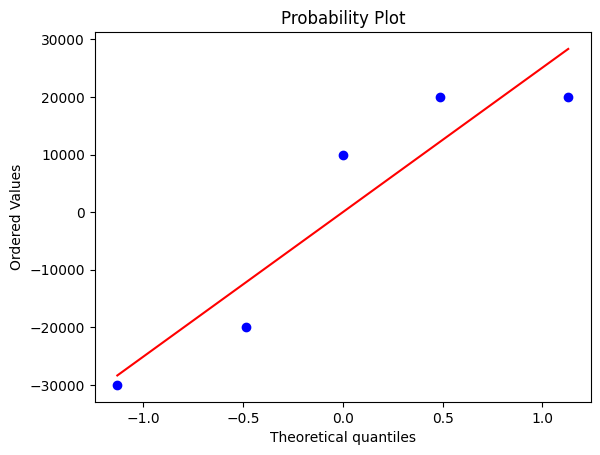

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as stats

errors = [310000 - 300000, 420000 - 450000, 570000 - 550000, 380000 - 400000, 620000 - 600000]

stats.probplot(errors, plot=plt)
plt.show()

Absolute Percentage Error

We can calculate the Absolute Percentage Error (APE) for each instance:

Output: [3.33, 6.67, 3.64, 5.0, 3.33]
The APE values indicate the percentage deviation of the prediction from the actual value for each instance. We can analyze the distribution, summary statistics, and trends in APE to assess the model's overall accuracy.

In [5]:
actual = [300000, 450000, 550000, 400000, 600000]
predicted = [310000, 420000, 570000, 380000, 620000]

ape = []
for i in range(len(actual)):
    ape.append(abs(predicted[i] - actual[i]) / actual[i] * 100)

print(ape)

[3.3333333333333335, 6.666666666666667, 3.6363636363636362, 5.0, 3.3333333333333335]


Error Bias Table

We can group the errors by relevant factors (e.g., price range, location) and calculate summary statistics to identify potential biases:

This table shows that the model tends to overpredict for low and high-priced houses, but underpredict for medium-priced houses, suggesting potential biases based on price range.

In [6]:
import pandas as pd

data = {'Actual': [300000, 450000, 550000, 400000, 600000],
        'Predicted': [310000, 420000, 570000, 380000, 620000],
        'Price Range': ['Low', 'Medium', 'High', 'Medium', 'High']}

df = pd.DataFrame(data)
df['Error'] = df['Predicted'] - df['Actual']

print(df.groupby('Price Range')['Error'].agg(['mean', 'median']))

                mean   median
Price Range                  
High         20000.0  20000.0
Low          10000.0  10000.0
Medium      -25000.0 -25000.0


Predicted vs Actual per Group

We can visualize the predicted vs actual values grouped by relevant factors (e.g., location, price range) to identify patterns or biases:

This scatter plot, grouped by location, can reveal if the model performs differently across different locations or if there are location-specific biases.

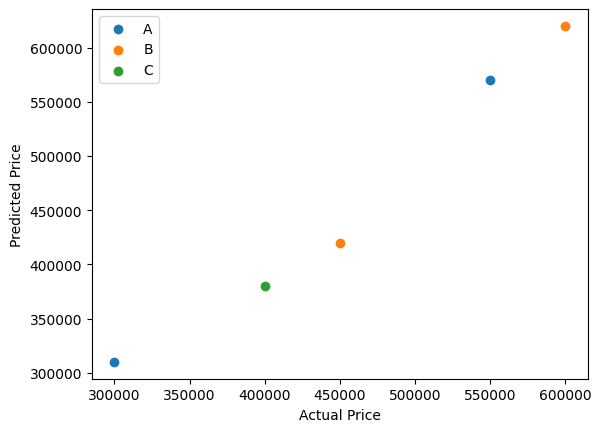

In [7]:
import matplotlib.pyplot as plt

data = {'Actual': [300000, 450000, 550000, 400000, 600000],
        'Predicted': [310000, 420000, 570000, 380000, 620000],
        'Location': ['A', 'B', 'A', 'C', 'B']}

df = pd.DataFrame(data)

for loc, group in df.groupby('Location'):
    plt.scatter(group['Actual'], group['Predicted'], label=loc)

plt.legend()
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


Predicted vs Actual in Time

If the data includes a time component, we can visualize the predicted vs actual values over time to identify any temporal patterns or drifts:

This line plot can reveal any seasonal patterns, trends, or drifts in the model's performance over time, which may indicate the need for retraining or updating the model.

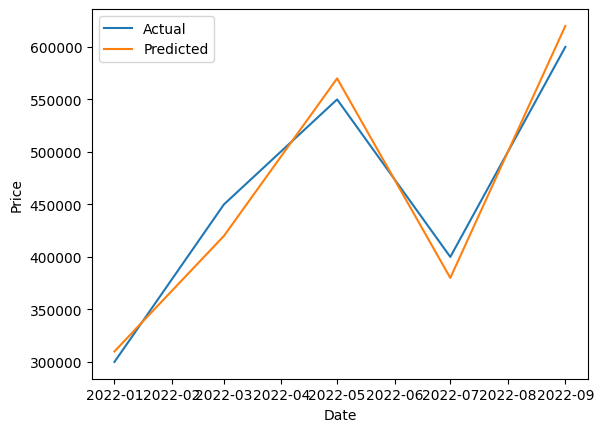

In [8]:
import matplotlib.pyplot as plt

data = {'Actual': [300000, 450000, 550000, 400000, 600000],
        'Predicted': [310000, 420000, 570000, 380000, 620000],
        'Date': ['2022-01-01', '2022-03-01', '2022-05-01', '2022-07-01', '2022-09-01']}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

plt.plot(df['Date'], df['Actual'], label='Actual')
plt.plot(df['Date'], df['Predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
